In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import scipy
import numpy.ma as ma
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
n_features = [1, 5, 10, 20, 30, 40]

## APS Dataset

In [3]:
dataset_path_prefix = './Datasets/APS/Q1/'
APS_guest_full_test = pd.read_csv(dataset_path_prefix +  'APS_guest_full_test.csv', na_values = 'na', index_col = 'info')
APS_guest_full_train = pd.read_csv(dataset_path_prefix +  'APS_guest_full_train.csv', na_values = 'na', index_col = 'info')
APS_host_full_test = pd.read_csv(dataset_path_prefix +  'APS_host_full_test.csv', na_values = 'na', index_col = 'info')
APS_host_full_train = pd.read_csv(dataset_path_prefix +  'APS_host_full_train.csv', na_values = 'na', index_col = 'info')

In [4]:
# sanity check
assert(len(APS_guest_full_test) == len(APS_host_full_test))
assert(len(APS_guest_full_train) == len(APS_host_full_train))
assert(len(APS_guest_full_test.columns) == len(APS_host_full_test.columns)+1)
assert(len(APS_guest_full_train.columns) == len(APS_host_full_train.columns)+1)

In [5]:
APS_train_df = pd.concat([APS_guest_full_train, APS_host_full_train], axis = 1)
APS_test_df = pd.concat([APS_guest_full_test, APS_host_full_test], axis = 1)
print(len(APS_train_df.columns))

171


## Madelon Dataset

In [6]:
dataset_path_prefix = './Datasets/Madelon/'
Madelon_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/Madelon_guest_full_test.csv', na_values = 'na', index_col = 'info')
Madelon_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/Madelon_guest_full_train.csv', na_values = 'na', index_col = 'info')
Madelon_host_full_test = pd.read_csv(dataset_path_prefix +  'Madelon_host_test.csv', na_values = 'na', index_col = 'info')
Madelon_host_full_train = pd.read_csv(dataset_path_prefix +  'Madelon_host_train.csv', na_values = 'na', index_col = 'info')

In [10]:
# sanity check
assert(len(Madelon_guest_full_test) == len(Madelon_host_full_test))
assert(len(Madelon_guest_full_train) == len(Madelon_host_full_train))
assert(len(Madelon_guest_full_test.columns) == len(Madelon_host_full_test.columns)+1)
assert(len(Madelon_guest_full_train.columns) == len(Madelon_host_full_train.columns)+1)

In [11]:
Madelon_train_df = pd.concat([Madelon_guest_full_train, Madelon_host_full_train], axis = 1)
Madelon_test_df = pd.concat([Madelon_guest_full_test, Madelon_host_full_test], axis = 1)
print(len(Madelon_train_df.columns))

501


## Parkinson Dataset

In [12]:
dataset_path_prefix = './Datasets/Parkinson/Q1/'
Parkinson_guest_full_test = pd.read_csv(dataset_path_prefix +  'Parkinson_guest_full_test.csv', na_values = 'na', index_col = 'info')
Parkinson_guest_full_train = pd.read_csv(dataset_path_prefix +  'Parkinson_guest_full_train.csv', na_values = 'na', index_col = 'info')
Parkinson_host_full_test = pd.read_csv(dataset_path_prefix +  'Parkinson_host_full_test.csv', na_values = 'na', index_col = 'info')
Parkinson_host_full_train = pd.read_csv(dataset_path_prefix +  'Parkinson_host_full_train.csv', na_values = 'na', index_col = 'info')

In [16]:
# sanity check
assert(len(Parkinson_guest_full_test) == len(Parkinson_host_full_test))
assert(len(Parkinson_guest_full_train) == len(Parkinson_host_full_train))
assert(len(Parkinson_guest_full_test.columns) == len(Parkinson_host_full_test.columns)+2)
assert(len(Parkinson_guest_full_train.columns) == len(Parkinson_host_full_train.columns)+2)

In [17]:
Parkinson_train_df = pd.concat([Parkinson_guest_full_train, Parkinson_host_full_train], axis = 1)
Parkinson_test_df = pd.concat([Parkinson_guest_full_test, Parkinson_host_full_test], axis = 1)
print(len(Parkinson_train_df.columns))

754


## Gisette Dataset

In [18]:
dataset_path_prefix = './Datasets/Gisette/'
Gisette_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/Gisette_guest_full_test.csv', na_values = 'na', index_col = 'info')
Gisette_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/Gisette_guest_full_train.csv', na_values = 'na', index_col = 'info')
Gisette_host_full_test = pd.read_csv(dataset_path_prefix +  'Gisette_host_test.csv', na_values = 'na', index_col = 'info')
Gisette_host_full_train = pd.read_csv(dataset_path_prefix +  'Gisette_host_train.csv', na_values = 'na', index_col = 'info')

In [20]:
# sanity check
assert(len(Gisette_guest_full_test) == len(Gisette_host_full_test))
assert(len(Gisette_guest_full_train) == len(Gisette_host_full_train))
assert(len(Gisette_guest_full_test.columns) == len(Gisette_host_full_test.columns)+1)
assert(len(Gisette_guest_full_train.columns) == len(Gisette_host_full_train.columns)+1)

In [21]:
Gisette_train_df = pd.concat([Gisette_guest_full_train, Gisette_host_full_train], axis = 1)
Gisette_test_df = pd.concat([Gisette_guest_full_test, Gisette_host_full_test], axis = 1)
print(len(Gisette_train_df.columns))

5001


## Ad Dataset

In [22]:
dataset_path_prefix = './Datasets/Ad/Q1/'
Ad_guest_full_test = pd.read_csv(dataset_path_prefix +  'Ad_guest_full_test.csv', na_values = 'na', index_col = 'info')
Ad_guest_full_train = pd.read_csv(dataset_path_prefix +  'Ad_guest_full_train.csv', na_values = 'na', index_col = 'info')
Ad_host_full_test = pd.read_csv(dataset_path_prefix +  'Ad_host_full_test.csv', na_values = 'na', index_col = 'info')
Ad_host_full_train = pd.read_csv(dataset_path_prefix +  'Ad_host_full_train.csv', na_values = 'na', index_col = 'info')

In [23]:
# sanity check
assert(len(Ad_guest_full_test) == len(Ad_host_full_test))
assert(len(Ad_guest_full_train) == len(Ad_host_full_train))
assert(len(Ad_guest_full_test.columns) == len(Ad_host_full_test.columns)+1)
assert(len(Ad_guest_full_train.columns) == len(Ad_host_full_train.columns)+1)

In [24]:
Ad_train_df = pd.concat([Ad_guest_full_train, Ad_host_full_train], axis = 1)
Ad_test_df = pd.concat([Ad_guest_full_test, Ad_host_full_test], axis = 1)
print(len(Ad_train_df.columns))

1559


## Processed Dataset List

In [35]:
dataset_list = [
    {'train_df_no_y': APS_train_df.drop('class', 1), 'train_y': APS_train_df['class'], 'test_df_no_y': APS_test_df.drop('class', 1), 'test_y': APS_test_df['class'], 'dataset_name': 'APS'},
    {'train_df_no_y': Madelon_train_df.drop('class', 1), 'train_y': Madelon_train_df['class'], 'test_df_no_y': Madelon_test_df.drop('class', 1), 'test_y': Madelon_test_df['class'], 'dataset_name': 'Madelon'},
    {'train_df_no_y': Parkinson_train_df.drop('class', 1), 'train_y': Parkinson_train_df['class'], 'test_df_no_y': Parkinson_test_df.drop('class', 1), 'test_y': Parkinson_test_df['class'], 'dataset_name': 'Parkinson'},
    {'train_df_no_y': Gisette_train_df.drop('class', 1), 'train_y': Gisette_train_df['class'], 'test_df_no_y': Gisette_test_df.drop('class', 1), 'test_y': Gisette_test_df['class'], 'dataset_name': 'Gisette'},
    {'train_df_no_y': Ad_train_df.drop('class', 1), 'train_y': Ad_train_df['class'], 'test_df_no_y': Ad_test_df.drop('class', 1), 'test_y': Ad_test_df['class'], 'dataset_name': 'Ad'}
]

## coefficient of variance (statistic_filter)

In [38]:
def create_cv_dfs(train_dfs, test_dfs, n_features):
    all_dfs = pd.concat([train_dfs, test_dfs])
    cv_res = scipy.stats.variation(all_dfs, nan_policy = 'omit')
    cv_res = ma.getdata(cv_res).tolist()
    
    # remove the columns that coeficient of variance is 0
    to_rm = []
    for idx in range(len(cv_res)):
        if (cv_res[idx] == 0):
            to_rm.insert(0, idx)
    for idx in to_rm:
        print('removing column ' + str(idx) + ', because of 0 cv value')
        cv_res.pop(idx)
        train_dfs.drop(train_dfs.columns[idx] ,1)
        test_dfs.drop(test_dfs.columns[idx], 1)
        
    train_res = []
    test_res = []
    # select features with n smallest cv value (larget than 0)
    for n_feature in n_features:
        smallest_idx = sorted(range(len(cv_res)), key=lambda k: cv_res[k])[:n_feature]
        print(smallest_idx)
        tmp = train_dfs.iloc[:, smallest_idx]
        print('df', len(tmp.columns), len(tmp))
        train_res.append(tmp)
        test_res.append(test_dfs.iloc[:, smallest_idx])
    return train_res, test_res

In [43]:
dataset_list_statistic_filter = []
for dataset in dataset_list: 
    train_selected, test_selected = create_cv_dfs(dataset['train_df_no_y'], dataset['test_df_no_y'], n_features)
    dataset_list_statistic_filter.append({'train_selected': train_selected, 'train_y': dataset['train_y'], 'test_selected': test_selected, 'test_y': dataset['test_y'], 'dataset_name': dataset['dataset_name']})
assert(len(dataset_list_statistic_filter) == len(dataset_list))

removing column 89, because of 0 cv value
[78]
df 1 6000
[78, 77, 87, 76, 71]
df 5 6000
[78, 77, 87, 76, 71, 86, 75, 74, 72, 73]
df 10 6000
[78, 77, 87, 76, 71, 86, 75, 74, 72, 73, 79, 119, 112, 130, 124, 118, 143, 89, 147, 2]
df 20 6000
[78, 77, 87, 76, 71, 86, 75, 74, 72, 73, 79, 119, 112, 130, 124, 118, 143, 89, 147, 2, 142, 22, 23, 67, 16, 146, 156, 62, 82, 110]
df 30 6000
[78, 77, 87, 76, 71, 86, 75, 74, 72, 73, 79, 119, 112, 130, 124, 118, 143, 89, 147, 2, 142, 22, 23, 67, 16, 146, 156, 62, 82, 110, 81, 93, 103, 80, 0, 12, 117, 53, 84, 83]
df 40 6000
[90]
df 1 2000
[90, 423, 276, 404, 228]
df 5 2000
[90, 423, 276, 404, 228, 332, 168, 173, 283, 205]
df 10 2000
[90, 423, 276, 404, 228, 332, 168, 173, 283, 205, 154, 402, 7, 280, 198, 166, 39, 357, 445, 387]
df 20 2000
[90, 423, 276, 404, 228, 332, 168, 173, 283, 205, 154, 402, 7, 280, 198, 166, 39, 357, 445, 387, 473, 227, 120, 392, 394, 237, 40, 247, 252, 96]
df 30 2000
[90, 423, 276, 404, 228, 332, 168, 173, 283, 205, 154, 402, 7,

## Population Stability Index (PSI filter)

In [61]:
from psi import calculate_psi

def create_psi_dfs(train_dfs, test_dfs, train_y, test_y, n_features):
    all_dfs = pd.concat([train_dfs, test_dfs])
    all_y = pd.concat([train_y, test_y])
    cv_res = []
    for column in all_dfs.columns:
        cv_res.append(calculate_psi(all_y, all_dfs[column]))

    train_res = []
    test_res = []
    # select features with n smallest cv value (larget than 0)
    for n_feature in n_features:
        smallest_idx = sorted(range(len(cv_res)), key=lambda k: cv_res[k])[:n_feature]
        print(smallest_idx)
        tmp = train_dfs.iloc[:, smallest_idx]
        print('df', len(tmp.columns), len(tmp))
        train_res.append(tmp)
        test_res.append(test_dfs.iloc[:, smallest_idx])
    return train_res, test_res

In [62]:
dataset_list_psi_filter = []
for dataset in dataset_list: 
    train_selected, test_selected = create_psi_dfs(train_dfs = dataset['train_df_no_y'], test_dfs = dataset['test_df_no_y'], train_y = dataset['train_y'], test_y = dataset['test_y'], n_features = n_features)
    dataset_list_psi_filter.append({'train_selected': train_selected, 'train_y': dataset['train_y'], 'test_selected': test_selected, 'test_y': dataset['test_y'], 'dataset_name': dataset['dataset_name']})
assert(len(dataset_list_psi_filter) == len(dataset_list))

[41]
df 1 6000
[41, 32, 7, 6, 29]
df 5 6000
[41, 32, 7, 6, 29, 27, 33, 34, 35, 51]
df 10 6000
[41, 32, 7, 6, 29, 27, 33, 34, 35, 51, 99, 36, 168, 153, 169, 154, 122, 8, 140, 141]
df 20 6000
[41, 32, 7, 6, 29, 27, 33, 34, 35, 51, 99, 36, 168, 153, 169, 154, 122, 8, 140, 141, 138, 139, 4, 5, 19, 26, 134, 135, 50, 17]
df 30 6000
[41, 32, 7, 6, 29, 27, 33, 34, 35, 51, 99, 36, 168, 153, 169, 154, 122, 8, 140, 141, 138, 139, 4, 5, 19, 26, 134, 135, 50, 17, 28, 95, 100, 136, 18, 9, 129, 137, 93, 49]
df 40 6000
[105]
df 1 2000
[105, 0, 1, 2, 3]
df 5 2000
[105, 0, 1, 2, 3, 4, 5, 6, 7, 8]
df 10 2000
[105, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
df 20 2000
[105, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
df 30 2000
[105, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
df 40 2000
[0]
df 1 567
[0, 19, 364, 35, 59]


## Train Model with XGBoost

In [44]:
params = {'eval_metric': ['logloss', 'auc'],
         'learning_rate': 0.3,
         'max_depth': 5,
         'min_child_weight': 1,
         'subsample': 0.8
}

In [45]:
def train(x_train_dfs, y_train, x_test_dfs, y_test):
    test_auc = []
    for _,(x_train_df, x_test_df) in enumerate(zip(x_train_dfs, x_test_dfs)):
        dtrain = xgb.DMatrix(x_train_df, label=y_train)
        dtest = xgb.DMatrix(x_test_df, label=y_test)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=200,
            evals=[(dtest, "Test")])
        y_predict= model.predict(dtest).astype(np.float64)
        test_auc.append(roc_auc_score(y_test, y_predict))
    return test_auc

## Method for making plot

In [65]:
def plot(test_auc, n_features, dataset_name, filter_method):
    plt.figure()
    plt.plot(n_features,test_auc, color='darkorange',lw=2)
    plt.xlabel('Number of Features')
    plt.ylabel('Test AUC')
    plt.title(dataset_name + ' Dataset with ' + filter_method)
    plt.savefig(('results/' + dataset_name + '_' + filter_method + '.png').replace(' ', '_'))
    plt.show()

## Train & Plot for statistic filter

In [66]:
test_auc_list = []
for dataset in dataset_list_statistic_filter:
    test_auc = train(dataset['train_selected'], dataset['train_y'], dataset['test_selected'], dataset['test_y'])
    test_auc_list.append({'test_auc': test_auc, 'dataset_name': dataset['dataset_name']})

.32937	Test-auc:0.94534
[141]	Test-logloss:0.32869	Test-auc:0.94539
[142]	Test-logloss:0.36566	Test-auc:0.94385
[143]	Test-logloss:0.36526	Test-auc:0.94308
[144]	Test-logloss:0.36510	Test-auc:0.94268
[145]	Test-logloss:0.36498	Test-auc:0.94280
[146]	Test-logloss:0.36552	Test-auc:0.94279
[147]	Test-logloss:0.36475	Test-auc:0.94189
[148]	Test-logloss:0.36532	Test-auc:0.94252
[149]	Test-logloss:0.36521	Test-auc:0.94246
[150]	Test-logloss:0.36576	Test-auc:0.94080
[151]	Test-logloss:0.36590	Test-auc:0.94101
[152]	Test-logloss:0.36619	Test-auc:0.94084
[153]	Test-logloss:0.32703	Test-auc:0.94490
[154]	Test-logloss:0.32718	Test-auc:0.94417
[155]	Test-logloss:0.32715	Test-auc:0.94497
[156]	Test-logloss:0.28977	Test-auc:0.94690
[157]	Test-logloss:0.28987	Test-auc:0.94625
[158]	Test-logloss:0.29032	Test-auc:0.94605
[159]	Test-logloss:0.29017	Test-auc:0.94611
[160]	Test-logloss:0.29048	Test-auc:0.94649
[161]	Test-logloss:0.29109	Test-auc:0.94603
[162]	Test-logloss:0.29262	Test-auc:0.94541
[163]	Te

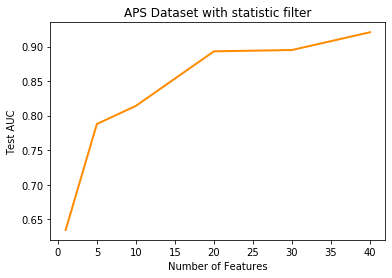

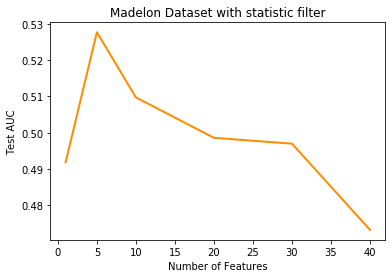

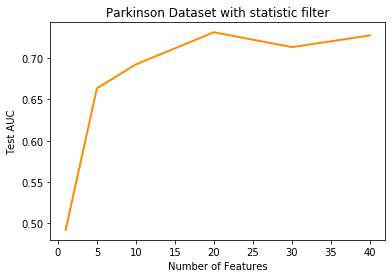

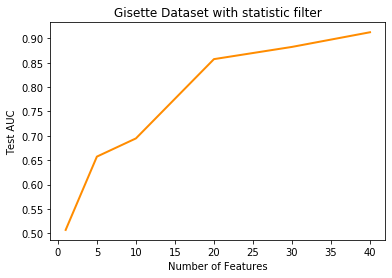

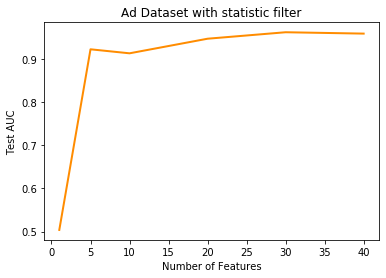

In [67]:
for test_auc in test_auc_list:
    plot(test_auc['test_auc'], n_features, test_auc['dataset_name'], 'statistic filter')

## Train & Plot for PSI filter

In [68]:
test_auc_list = []
for dataset in dataset_list_psi_filter:
    test_auc = train(dataset['train_selected'], dataset['train_y'], dataset['test_selected'], dataset['test_y'])
    test_auc_list.append({'test_auc': test_auc, 'dataset_name': dataset['dataset_name']})

.16400	Test-auc:0.96478
[141]	Test-logloss:0.16409	Test-auc:0.96408
[142]	Test-logloss:0.16476	Test-auc:0.96453
[143]	Test-logloss:0.16448	Test-auc:0.96550
[144]	Test-logloss:0.16400	Test-auc:0.96597
[145]	Test-logloss:0.16436	Test-auc:0.96557
[146]	Test-logloss:0.12872	Test-auc:0.96582
[147]	Test-logloss:0.16470	Test-auc:0.96538
[148]	Test-logloss:0.16567	Test-auc:0.96534
[149]	Test-logloss:0.16530	Test-auc:0.96549
[150]	Test-logloss:0.16562	Test-auc:0.96496
[151]	Test-logloss:0.12831	Test-auc:0.96682
[152]	Test-logloss:0.12834	Test-auc:0.96666
[153]	Test-logloss:0.12854	Test-auc:0.96595
[154]	Test-logloss:0.12832	Test-auc:0.96598
[155]	Test-logloss:0.12806	Test-auc:0.96757
[156]	Test-logloss:0.12859	Test-auc:0.96749
[157]	Test-logloss:0.16491	Test-auc:0.96646
[158]	Test-logloss:0.16513	Test-auc:0.96654
[159]	Test-logloss:0.20429	Test-auc:0.96308
[160]	Test-logloss:0.20447	Test-auc:0.96313
[161]	Test-logloss:0.20356	Test-auc:0.96485
[162]	Test-logloss:0.20350	Test-auc:0.96537
[163]	Te

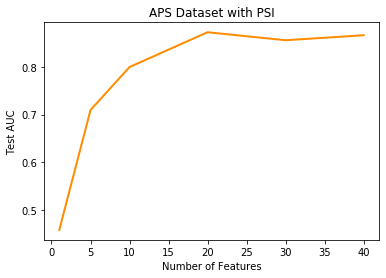

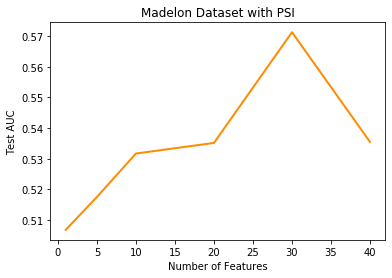

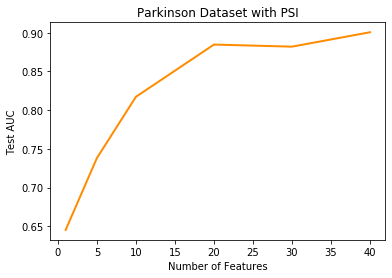

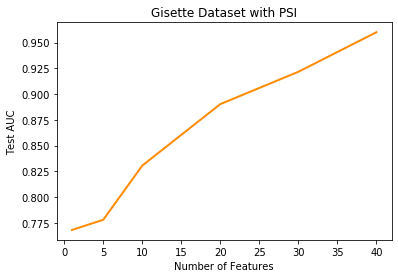

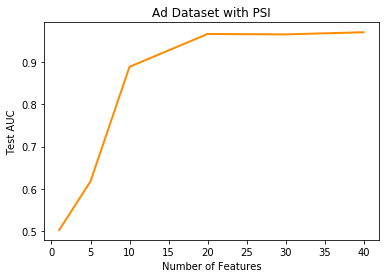

In [69]:
for test_auc in test_auc_list:
    plot(test_auc['test_auc'], n_features, test_auc['dataset_name'], 'PSI')